In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from sqlalchemy import create_engine

database_name = 'week1'
table_name = 'xdr_data'

connection_params = {
    "host": "localhost",
    "user": "postgres",
    "password": "lhtdss",
    "port": "5432",
    "database": database_name
}

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")

# str or SQLAlchemy Selectable (select or text object)
sql_query = 'SELECT * FROM xdr_data '

telecom = pd.read_sql(sql_query, con=engine)

In [4]:
telecom[[ 
 'Bearer Id',
 'Handset Manufacturer',
 'Handset Type', 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)' ]].head(5)


,Bearer Id,Handset Manufacturer,Handset Type,Start,Start ms,End,End ms,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Samsung,Samsung Galaxy A5 Sm-A520F,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,1545765.0,24420.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,Samsung,Samsung Galaxy J5 (Sm-J530),4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,1926113.0,7165.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,Samsung,Samsung Galaxy A8 (2018),4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,1684053.0,42224.0,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,undefined,undefined,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,644121.0,13372.0,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,Samsung,Samsung Sm-G390F,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,862600.0,50188.0,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# number of users 
number_of_users = telecom['MSISDN/Number'].nunique()
# telecom[ 'MSISDN/Number'].isna().sum()
print (f"number of users = {number_of_users}")

number of users = 106856


In [6]:
#number of sessions
telecom['Bearer Id'].shape[0]

150001

In [7]:
telecom[[ 
 'Bearer Id',
 'Handset Manufacturer',
 'Handset Type', 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'Total UL (Bytes)',
 'Total DL (Bytes)' ]].head(5)

,Bearer Id,Handset Manufacturer,Handset Type,Start,Start ms,End,End ms,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Samsung,Samsung Galaxy A5 Sm-A520F,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,36749741.0,308879636.0
1,1.311448e+19,Samsung,Samsung Galaxy J5 (Sm-J530),4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,53800391.0,653384965.0
2,1.311448e+19,Samsung,Samsung Galaxy A8 (2018),4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,27883638.0,279807335.0
3,1.311448e+19,undefined,undefined,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,43324218.0,846028530.0
4,1.311448e+19,Samsung,Samsung Sm-G390F,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,38542814.0,569138589.0


In [8]:
# the number of session 
telecom['Bearer Id'].count()

149010

In [9]:
telecom['Bearer Id'].nunique()

134708

In [10]:
# delete null rows
telecom.dropna(subset=['Bearer Id'], inplace=True)


In [11]:
null_count = telecom['Bearer Id'].isnull().sum()
null_count

0

In [13]:
total_dl = telecom['Total DL (Bytes)'].sum()
total_ul = telecom[ 'Total UL (Bytes)'].sum()
print (total_dl,"and", total_ul)


67753213626785.0 and 6127649089043.0


In [12]:
# Aggregate per user
user_aggregated = telecom.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',               # Number of xDR sessions
    'Dur. (ms)': 'sum',      # Total session duration
    'Total DL (Bytes)': 'sum',          # Total download data
    'Total UL (Bytes)': 'sum'           # Total upload data
})
user_aggregated


,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0
3.360100e+10,1,181230.0,1.207552e+08,36104459.0
3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3.360101e+10,1,49878.0,4.019932e+08,20327526.0
3.360101e+10,2,37104.0,1.363130e+09,94280527.0
...,...,...,...,...
3.379000e+10,1,8810.0,6.879252e+08,26716429.0
3.379000e+10,1,140988.0,4.445751e+08,35732243.0
3.197021e+12,1,877385.0,1.948281e+08,37295915.0


In [13]:
# Convert milliseconds to seconds
# run this only one time 
user_aggregated['Dur. (ms)'] = user_aggregated['Dur. (ms)']/1000



In [14]:

# Rename columns for clarity
user_aggregated.columns = ['Number of xDR sessions', 'Total Session Duration (s)',
                           'Total Download (Bytes)', 'Total Upload (Bytes)']

user_aggregated

,Number of xDR sessions,Total Session Duration (s),Total Download (Bytes),Total Upload (Bytes)
MSISDN/Number,,,,
3.360100e+10,1,116.720,8.426375e+08,36053108.0
3.360100e+10,1,181.230,1.207552e+08,36104459.0
3.360100e+10,1,134.969,5.566597e+08,39306820.0
3.360101e+10,1,49.878,4.019932e+08,20327526.0
3.360101e+10,2,37.104,1.363130e+09,94280527.0
...,...,...,...,...
3.379000e+10,1,8.810,6.879252e+08,26716429.0
3.379000e+10,1,140.988,4.445751e+08,35732243.0
3.197021e+12,1,877.385,1.948281e+08,37295915.0


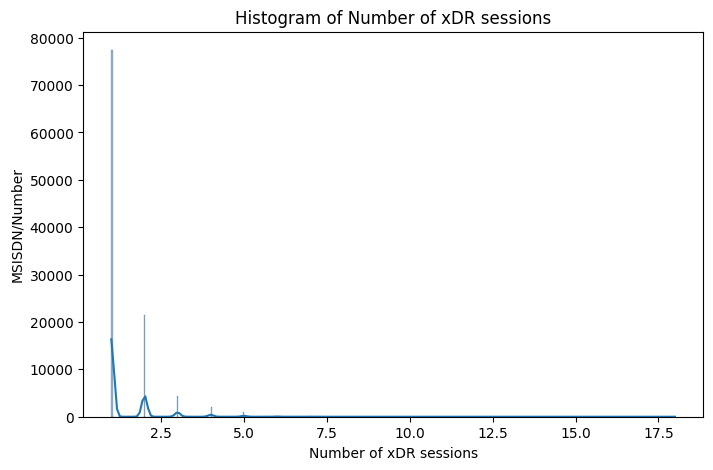

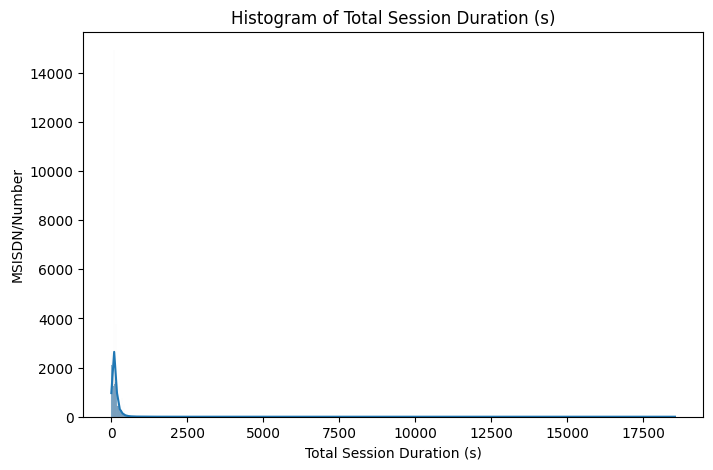

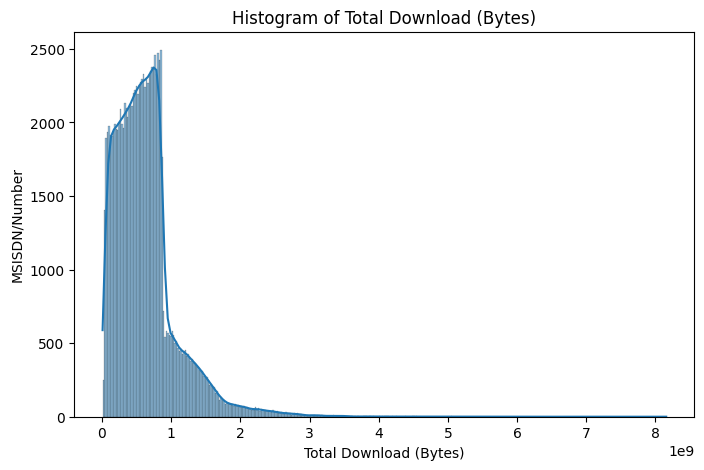

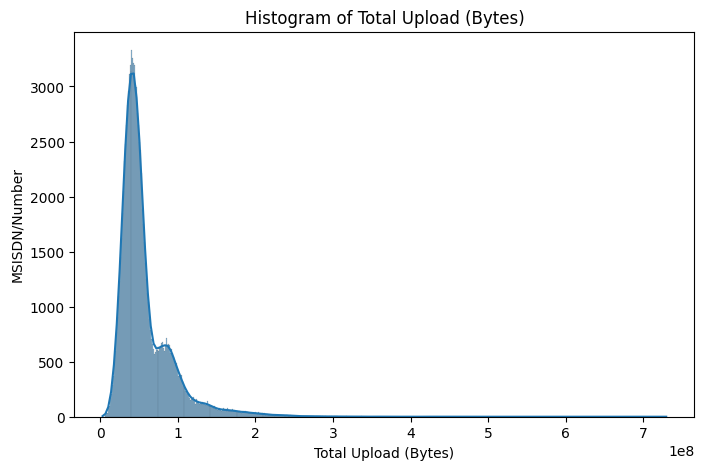

In [15]:
# Plot histograms for selected variables
selected_variables = ['Number of xDR sessions', 'Total Session Duration (s)',
                           'Total Download (Bytes)', 'Total Upload (Bytes)']

for variable in selected_variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(user_aggregated[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    plt.ylabel('MSISDN/Number')
    plt.show()

In [18]:
def plot_box(user_aggregated:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = user_aggregated, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

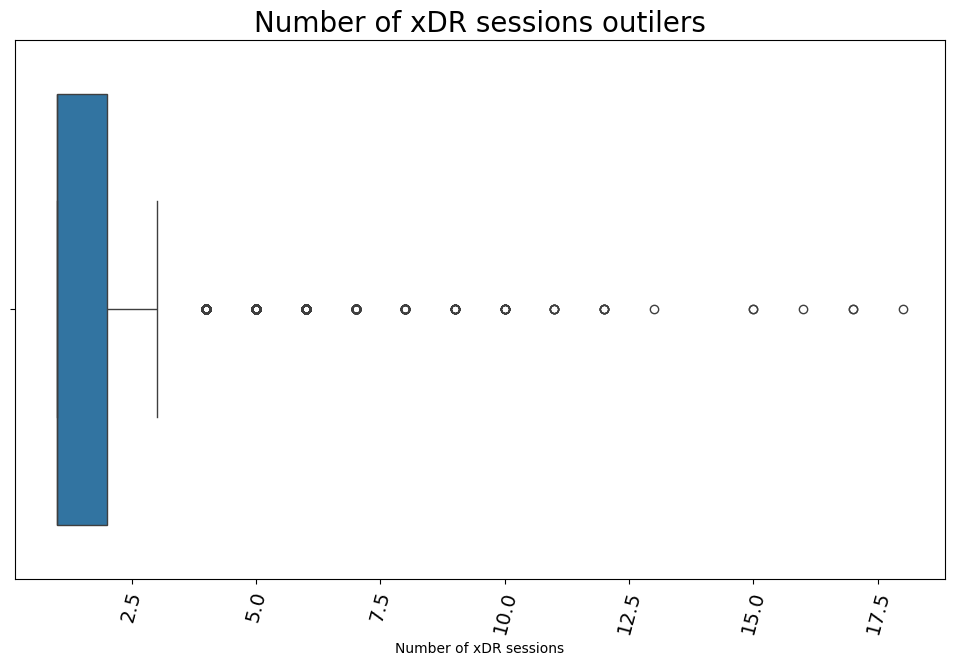

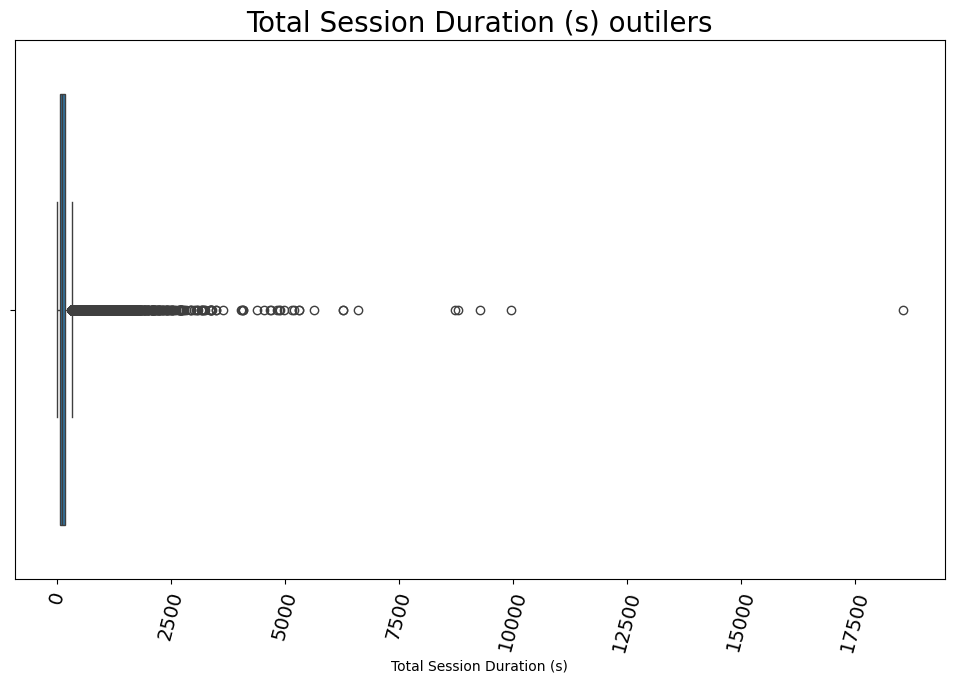

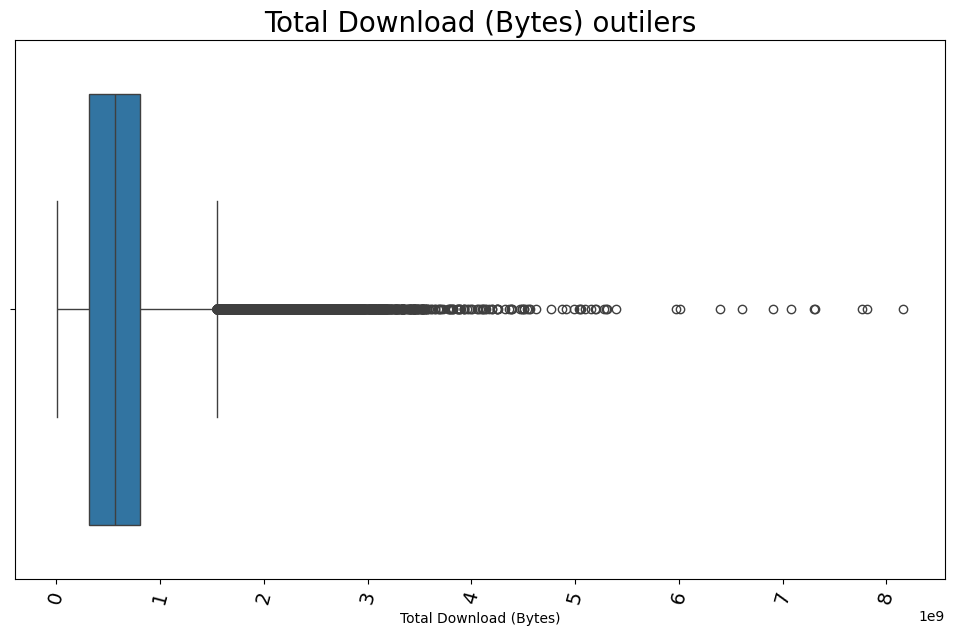

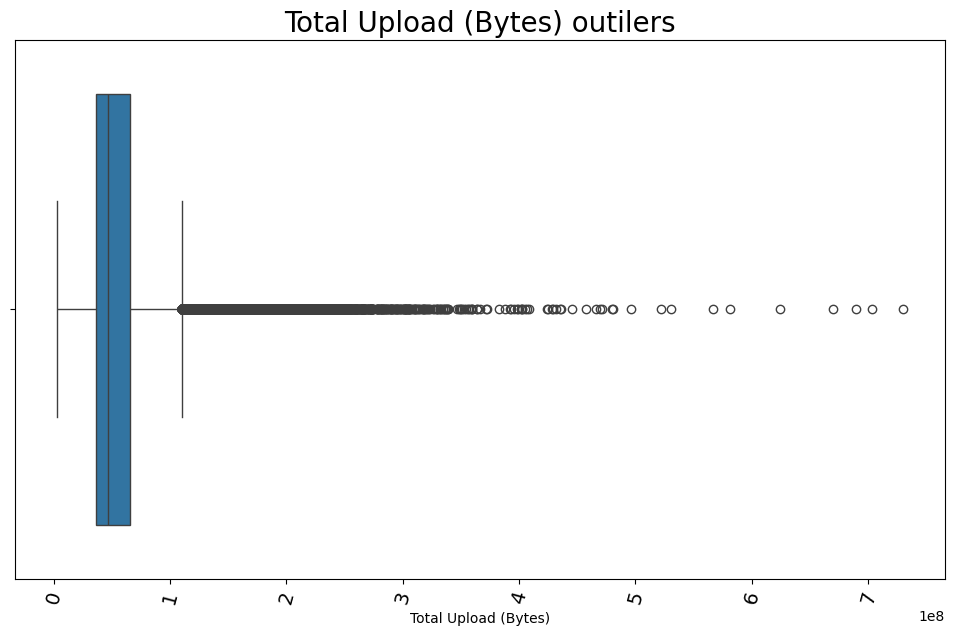

In [26]:
selected_variables = ['Number of xDR sessions', 'Total Session Duration (s)',
                           'Total Download (Bytes)', 'Total Upload (Bytes)']

for variable in selected_variables:
    plot_box(user_aggregated,variable, variable +' outilers')

In [28]:
user_aggregated.skew()

Number of xDR sessions         3.349315
Total Session Duration (s)    20.540593
Total Download (Bytes)         2.148081
Total Upload (Bytes)           2.892662
dtype: float64

In [31]:
user_aggregated.isna().sum()

Number of xDR sessions        0
Total Session Duration (s)    0
Total Download (Bytes)        0
Total Upload (Bytes)          0
dtype: int64